## Análisis de Rendimiento de Cultivos

La ciencia de entrenar máquinas para aprender y producir modelos para predicciones futuras se utiliza ampliamente, y no es en vano. La agricultura desempeña un papel crítico en la economía global. Con la continua expansión de la población humana, comprender el rendimiento de los cultivos a nivel mundial es fundamental para abordar los desafíos de seguridad alimentaria y reducir los impactos del cambio climático.

La predicción del rendimiento de los cultivos es un problema agrícola importante. El rendimiento agrícola depende principalmente de las condiciones climáticas (lluvia, temperatura, etc.), pesticidas y contar con información precisa sobre el historial del rendimiento de los cultivos es crucial para tomar decisiones relacionadas con la gestión del riesgo agrícola y las predicciones futuras. Los ingredientes básicos que sustentan a los humanos son similares. Consumimos mucho maíz, trigo, arroz y otros cultivos simples. En este proyecto, se establece la predicción de los 10 cultivos más consumidos en todo el mundo aplicando técnicas de aprendizaje automático. Se trata de un problema de regresión.

Estos cultivos incluyen:

1. Yuca
2. Maíz
3. Plátanos y otros
4. Papas
5. Arroz, paddy
6. Sorgo
7. Soja
8. Batatas
9. Trigo
10. Ñames

In [2]:
# Librerias
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve # función curva ROC
from sklearn.metrics import roc_auc_score # función AUC

### Recopilación y Limpieza de Datos

Datos de Rendimiento de Cultivos:
Después de importar las bibliotecas necesarias, se descargaron los datos de rendimiento de diez cultivos más consumidos en todo el mundo desde el sitio web de la FAO. Los datos recopilados incluyen país, ítem, año desde 1961 hasta 2016 y valor de rendimiento.

In [3]:
# Cargo el df con los paises y sus rendimientos 
df_yield = pd.read_csv(r'yield.csv')

In [4]:
# Chusmeo cantidad de filas y columnas 
df_yield.shape

(56717, 12)

In [5]:
# Muestro el df para ver como subio
df_yield.head(10)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
5,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1966,1966,hg/ha,14400
6,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1967,1967,hg/ha,14144
7,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1968,1968,hg/ha,17064
8,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1969,1969,hg/ha,17177
9,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1970,1970,hg/ha,14757


In [6]:
# Veo las ultimas filas del df
df_yield.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


In [7]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


Observando las columnas en el archivo CSV, podemos cambiar el nombre de "Value" a "hg/ha_yield" para que sea más fácil reconocer que este es nuestro valor de producción de rendimiento de cultivos. Además, se realizará la eliminación de columnas innecesarias como "Area Code", "Domain", "Item Code", etc.

In [8]:
# Renombro de columna Value a hg/ha_yield
df_yield = df_yield.rename(index=str, columns={'Value':'hg/ha_yield'})
# Veo el cambio del nombre
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [9]:
# Elimino columnas
df_yield = df_yield.drop(['Year Code', 'Element Code', 'Element', 'Area Code', 'Domain Code', 'Domain', 'Unit', 'Item Code'], axis=1)

# Veo el df
df_yield.head(10)

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400
5,Afghanistan,Maize,1966,14400
6,Afghanistan,Maize,1967,14144
7,Afghanistan,Maize,1968,17064
8,Afghanistan,Maize,1969,17177
9,Afghanistan,Maize,1970,14757


In [10]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


Datos Climáticos: Precipitación
Los factores climáticos incluyen la precipitación y la temperatura. Son componentes abióticos, junto con pesticidas y suelo, de los factores ambientales que influyen en el crecimiento y desarrollo de las plantas.

La precipitación tiene un efecto dramático en la agricultura. Para este proyecto, se recopiló información sobre la precipitación por año desde el Banco Mundial de Datos.

In [11]:
# Cargo df con el promedio de precipitación en milímetros por año
df_rain = pd.read_csv(r'rainfall.csv')

In [12]:
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [13]:
# Saco espacio en la columna Area
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [14]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [15]:
# Converto la columna "average_rain_fall_mm_per_year" de tipo objeto a tipo float 
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'], errors= 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


A continuación, eliminando cualquier fila vacía del conjunto de datos y fusionando el DataFrame de rendimiento con el DataFrame de lluvia por las columnas de año y área.

In [16]:
df_rain = df_rain.dropna()

In [17]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [18]:
# El df_rain comienza en 1985 y termina en 2016
# Voy a fusionar los los dataset por fecha y area
yield_df = pd.merge(df_yield, df_rain, on=['Year', 'Area'])

In [19]:
# Veo como quedo el df con la union
yield_df.shape

(25385, 5)

In [20]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


Se ve que la union limpio los años que no tenian informacion antes arrancaba 1961 y ahora 1985 

In [21]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


Datos de Pesticidas:
Los pesticidas utilizados para cada ítem y país también fueron recopilados de

In [22]:
df_pes = pd.read_csv(r'pesticides.csv')

In [23]:
df_pes.head(10)

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
5,Pesticides Use,Albania,Use,Pesticides (total),1995,tonnes of active ingredients,251.00
6,Pesticides Use,Albania,Use,Pesticides (total),1996,tonnes of active ingredients,313.96
7,Pesticides Use,Albania,Use,Pesticides (total),1997,tonnes of active ingredients,376.93
8,Pesticides Use,Albania,Use,Pesticides (total),1998,tonnes of active ingredients,439.89
9,Pesticides Use,Albania,Use,Pesticides (total),1999,tonnes of active ingredients,502.86


In [24]:
# Renombro la columa Value a pesticides_tonnes oara que sea representativa
df_pes = df_pes.rename(index=str, columns={'Value':'pesticides_tonnes'})
# Elimino columna element, domain, unit, item que no suban datos 
df_pes = df_pes.drop(['Element', 'Domain', 'Unit', 'Item'], axis=1)

In [25]:
df_pes.head(10)

,Area,Year,pesticides_tonnes
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
5,Albania,1995,251.00
6,Albania,1996,313.96
7,Albania,1997,376.93
8,Albania,1998,439.89
9,Albania,1999,502.86


In [26]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [27]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [28]:
# Voy a unir este yield_df con df_pes por año y area
yield_df = pd.merge(yield_df, df_pes, on=['Year', 'Area'])

In [29]:
yield_df.shape

(18949, 6)

In [30]:
yield_df.head(10)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0
5,Albania,Wheat,1990,30197,1485.0,121.0
6,Albania,Maize,1991,29068,1485.0,121.0
7,Albania,Potatoes,1991,77818,1485.0,121.0
8,Albania,"Rice, paddy",1991,28538,1485.0,121.0
9,Albania,Sorghum,1991,6667,1485.0,121.0


Temperatura Promedio:
La temperatura promedio para cada país fue recopilada del Banco Mundial.

In [31]:
avg_temp = pd.read_csv(r'temp.csv')

In [32]:
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [33]:
avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


avg_temp comienza con fecha en 1849 y tiene valores faltantes en temperatura promedio procedo renombrar country a area, los valores faltantes en avg_temp voy a ver si los lleva despues de la union 

In [34]:
avg_temp = avg_temp.rename(index=str, columns={'country':'Area'})

In [35]:
avg_temp = avg_temp.rename(index=str, columns={'year':'Year'})

In [36]:
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [37]:
# Fusio el avg_temp con el yield_df
yield_df = pd.merge(yield_df, avg_temp, on=['Area','Year'])

In [38]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [39]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [40]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [41]:
# Veo valores nulos
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

## Exploración de Datos

In [42]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [43]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


Se puede observar una alta variabilidad en los valores de cada columna; más adelante, tendré en cuenta eso al aplicar la escala.

In [44]:
# Veo la cantidad de areas totales 
yield_df['Area'].nunique()

101

El DataFrame tiene 101 países, ordenándolos de mayor a menor según la producción de rendimiento de los 10 principales.

In [45]:
yield_df.groupby(['Area'], sort=True)['hg/ha_yield'].sum().nlargest(10)


Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

India tiene la producción de rendimiento más alta en el conjunto de datos. Incluyendo elementos en el grupo:

In [46]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

India tiene la producción más alta de yuca y papas. Las papas parecen ser el cultivo dominante en el conjunto de datos, siendo el más alto en 4 países.

El DataFrame final comienza en 1990 y termina en 2013, lo que representa 23 años de datos para 101 países.

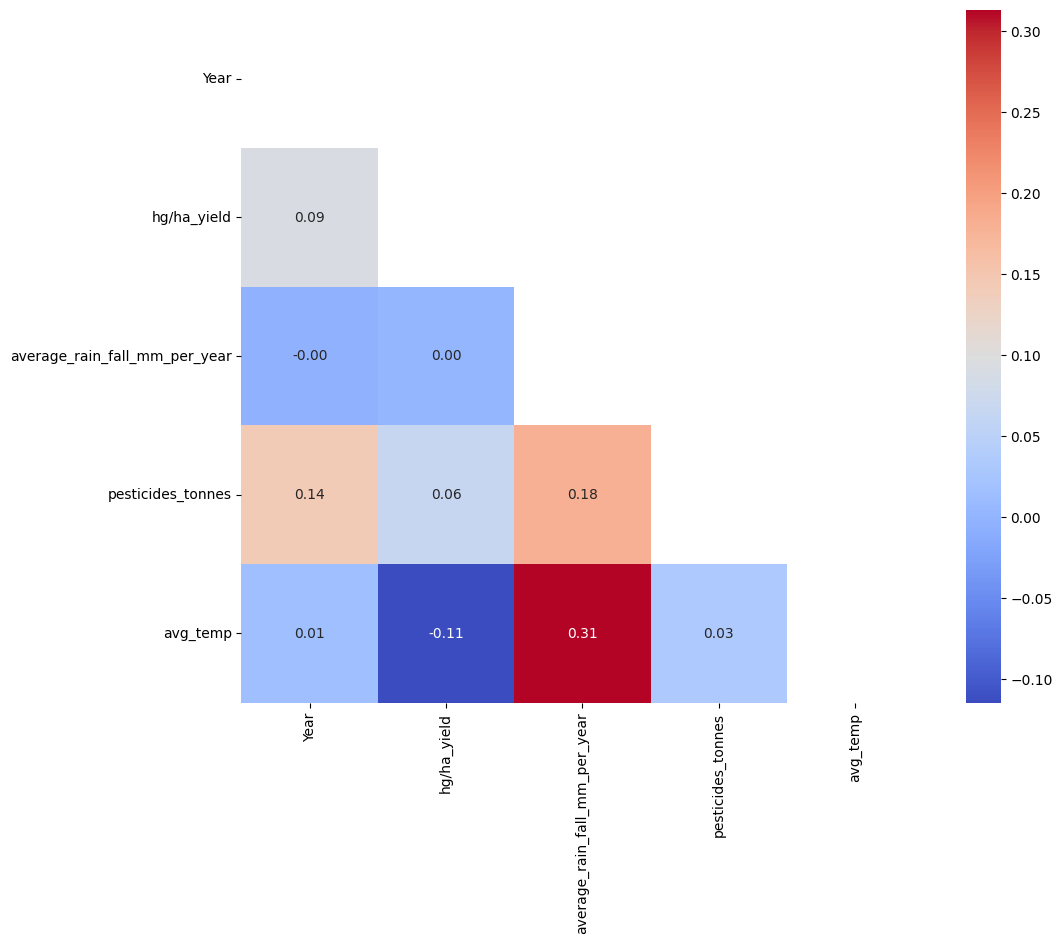

In [47]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.palette="vlag"

sns.heatmap(correlation_data, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


Como vemos no hay ninguna correlacion entre las columnas del dataset

In [48]:
yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [49]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [50]:
# Veo los registros correspondientes a Argetina 
yield_df[yield_df['Area'] == 'Argentina']

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
377,Argentina,Cassava,1990,100000,591.0,26156.00,17.46
378,Argentina,Cassava,1990,100000,591.0,26156.00,17.67
379,Argentina,Maize,1990,34608,591.0,26156.00,17.46
380,Argentina,Maize,1990,34608,591.0,26156.00,17.67
381,Argentina,Potatoes,1990,202747,591.0,26156.00,17.46
...,...,...,...,...,...,...,...
740,Argentina,Soybeans,2013,25391,591.0,171945.54,16.88
741,Argentina,Sweet potatoes,2013,147498,591.0,171945.54,16.45
742,Argentina,Sweet potatoes,2013,147498,591.0,171945.54,16.88
743,Argentina,Wheat,2013,26581,591.0,171945.54,16.45


In [51]:
# Creo una copia del df y el yield_df voy a eliminar Argentina para utilizar mas adelante con otro dataset
yield_df2 = yield_df.copy()

In [52]:
yield_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [53]:
yield_df = yield_df[yield_df['Area'] != 'Argentina']

In [54]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27874 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           27874 non-null  object 
 1   Item                           27874 non-null  object 
 2   Year                           27874 non-null  int64  
 3   hg/ha_yield                    27874 non-null  int64  
 4   average_rain_fall_mm_per_year  27874 non-null  float64
 5   pesticides_tonnes              27874 non-null  float64
 6   avg_temp                       27874 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [55]:
# Vamos a transformar las variables categoricas utilizando la tecnica one-hot
yield_df_onehot = pd.get_dummies(yield_df, columns = ['Area', 'Item'], prefix = ['Country','Item'])
# Creo una variable que no contenga hg/ha_yield
features = yield_df_onehot.loc[:,yield_df_onehot.columns != 'hg/ha_yield'] 
# Creo una variable solo con los valores de hg/ha_yield
label = yield_df['hg/ha_yield']

In [56]:
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [57]:
label.head()

0    36613
1    66667
2    23333
3    12500
4     7000
Name: hg/ha_yield, dtype: int64

In [58]:
# Elimino la columna año del nuevi df
features = features.drop(['Year'], axis=1)

In [59]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27874 entries, 0 to 28241
Columns: 113 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: bool(110), float64(3)
memory usage: 3.8 MB


In [60]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False



Escalado de Características:
Observando el conjunto de datos anterior, contiene características con magnitudes, unidades y rangos altamente variables. Las características con magnitudes altas tendrán mucho más peso en los cálculos de distancia que las características con magnitudes bajas.

Para suprimir este efecto, necesitamos llevar todas las características al mismo nivel de magnitudes. Esto se puede lograr mediante el escalado.

In [61]:
scaler = MinMaxScaler()
features=scaler.fit_transform(features)

Después de eliminar la columna de año y escalar todos los valores en las características, la matriz resultante se verá algo así:

In [62]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

### Division del dataset para la implantacion del modelo

In [63]:
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size = 0.3, random_state = 42)

### Comparación y Selección de Modelos

In [64]:
# Lista para almacenar los resultados de cada modelo
resultados_modelos = []

# Función para evaluar y mostrar métricas
def evaluar_modelo(modelo, train_data, test_data, train_labels, test_labels, nombre_modelo):
    # Entrenar el modelo
    modelo.fit(train_data, train_labels)

    # Realizo predicciones en conjuntos de entrenamiento y prueba
    y_pred_train = modelo.predict(train_data)
    y_pred_test = modelo.predict(test_data)

    # Calculo métricas
    mse_train = mean_squared_error(train_labels, y_pred_train)
    mse_test = mean_squared_error(test_labels, y_pred_test)
    rmse_train = mean_squared_error(train_labels, y_pred_train, squared=False)
    rmse_test = mean_squared_error(test_labels, y_pred_test, squared=False)
    r2_train = r2_score(train_labels, y_pred_train)
    r2_test = r2_score(test_labels, y_pred_test)
    mae_train = mean_absolute_error(train_labels, y_pred_train)
    mae_test = mean_absolute_error(test_labels, y_pred_test)

    # Mostro resultados
    print(f'Evaluación del {nombre_modelo}:')
    print('Train MSE:', mse_train)
    print('Test MSE:', mse_test)
    print('Train RMSE:', rmse_train)
    print('Test RMSE:', rmse_test)
    print('Train R^2:', r2_train)
    print('Test R^2:', r2_test)
    print('Train MAE:', mae_train)
    print('Test MAE:', mae_test)
    print('-----------------------------------------')

    # Almaceno resultados en la lista
    resultados_modelos.append({
        'Modelo': nombre_modelo,
        'Train MSE': mse_train,
        'Test MSE': mse_test,
        'Train RMSE': rmse_train,
        'Test RMSE': rmse_test,
        'Train R^2': r2_train,
        'Test R^2': r2_test,
        'Train MAE': mae_train,
        'Test MAE': mae_test,
    })

# Modelos a evaluar
modelos = {
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': svm.SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0)
}

# Evaluo cada modelo
for nombre_modelo, modelo in modelos.items():
    evaluar_modelo(modelo, train_data, test_data, train_labels, test_labels, nombre_modelo)

# Mostro resultados generales
print('Resultados generales:')
for resultado in resultados_modelos:
    print(resultado)

Evaluación del Decision Tree:
Train MSE: 2102531.1689559733
Test MSE: 279364514.25613153
Train RMSE: 1450.0107478760194
Test RMSE: 16714.200975701217
Train R^2: 0.9997080924049316
Test R^2: 0.9617214489551201
Train MAE: 118.56571506671449
Test MAE: 5996.285403961895
-----------------------------------------


Evaluación del SVR:
Train MSE: 8649321265.278126
Test MSE: 8767544688.651533
Train RMSE: 93001.72721663897
Test RMSE: 93635.1680120858
Train R^2: -0.20083954368919477
Test R^2: -0.20132976729862873
Train MAE: 56823.08292814715
Test MAE: 57000.01733051565
-----------------------------------------
Evaluación del Random Forest:
Train MSE: 2300164566.637453
Test MSE: 2298391411.1592283
Train RMSE: 47960.030928237036
Test RMSE: 47941.541601821984
Train R^2: 0.6806537202289762
Test R^2: 0.6850742006820898
Train MAE: 32425.422987901627
Test MAE: 32217.33097903433
-----------------------------------------
Evaluación del Gradient Boosting:
Train MSE: 765270681.7931241
Test MSE: 739442732.6369566
Train RMSE: 27663.52619954882
Test RMSE: 27192.6963105345
Train R^2: 0.8937526693554232
Test R^2: 0.8986814898041835
Train MAE: 17771.6458950621
Test MAE: 17571.407818565807
-----------------------------------------
Resultados generales:
{'Modelo': 'Decision Tree', 'Train MSE': 2102531.1689559733, 'Test

### Decision Tree:
- Observo que mi árbol de decisión tiene un error cuadrático medio (MSE) bajo en el conjunto de entrenamiento y un coeficiente de determinación (R^2) alto, lo cual indica un buen ajuste a mis datos de entrenamiento.
- Sin embargo, noto una brecha considerable entre el rendimiento en el conjunto de entrenamiento y el conjunto de prueba, sugiriendo que mi modelo podría estar sobreajustándose a los datos de entrenamiento.

### SVR:
- Mi modelo de regresión de vectores de soporte (SVR) está mostrando un rendimiento insatisfactorio, con un R^2 negativo en ambos conjuntos. Esto sugiere que mi modelo SVR no se está adaptando bien a mis datos.

### Random Forest:
- Mi bosque aleatorio muestra un rendimiento razonable con un R^2 de alrededor de 0.68 en el conjunto de entrenamiento y 0.69 en el conjunto de prueba.
- La brecha entre el rendimiento del conjunto de entrenamiento y prueba es relativamente pequeña en comparación con mi árbol de decisión.

### Gradient Boosting:
- Observo que mi modelo de aumento de gradiente ofrece un buen rendimiento en ambos conjuntos, con un R^2 alrededor de 0.89.
- La brecha entre el conjunto de entrenamiento y prueba es razonablemente pequeña, lo cual es alentador.

Basándome en estas métricas, parece que mi modelo de **Gradient Boosting** tiene el mejor rendimiento general para mis datos. No obstante, también es esencial tener en cuenta otros factores, como la interpretabilidad del modelo y el tiempo de entrenamiento. Puedo considerar ajustar los hiperparámetros del Gradient Boosting o explorar otros modelos según mis necesidades específicas.


In [65]:
# Preparacion del df para generar la prueba 
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [66]:
yield_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,66667,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,23333,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,12500,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,7000,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [67]:
# Creo un df de prueba 
test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns) 

In [68]:
# Extraigo la información sobre países (countries) y elementos (items)
cntry = test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack() > 0]
cntrylist = list(pd.DataFrame(cntry).index.get_level_values(1))
countries = [i.split("_")[1] for i in cntrylist]

itm = test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack() > 0]
itmlist = list(pd.DataFrame(itm).index.get_level_values(1))
items = [i.split("_")[1] for i in itmlist]

In [69]:
# Elimino columnas 
test_df.drop([col for col in test_df.columns if 'Item' in col], axis=1, inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col], axis=1, inplace=True)

In [70]:
# Agrego la columa 
test_df['Country'] = countries
test_df['Item'] = items

In [71]:
clf=GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0)
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
Cassava                 0.800937
Maize                   0.463733
Plantains and others    0.569179
Potatoes                0.761845
Rice, paddy             0.603160
Sorghum                 0.539868
Soybeans               -0.453552
Sweet potatoes          0.698642
Wheat                   0.671631
Yams                    0.772878
dtype: float64

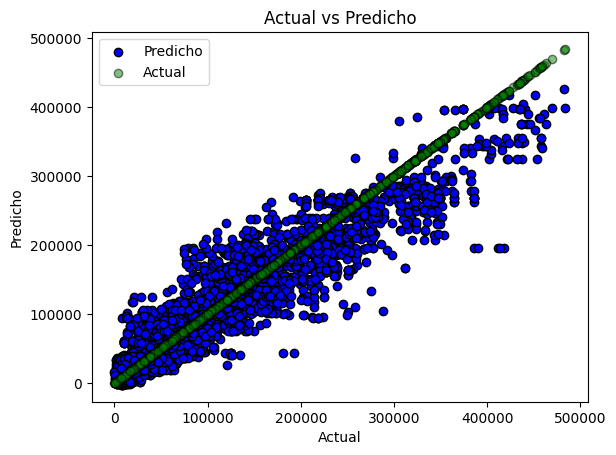

In [72]:
# Creao una figura y ejes
fig, ax = plt.subplots()

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"], edgecolors=(0, 0, 0), label='Predicho', color='blue')
ax.scatter(test_df["yield_actual"], test_df["yield_actual"], edgecolors=(0, 0, 0), label='Actual', color='green', alpha=0.5)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicho')
ax.set_title("Actual vs Predicho")
ax.legend()
plt.show();


Voy a utilizar la función adjusted_r_squared que calcula el coeficiente de determinación ajustado (adjusted R-squared). El coeficiente de determinación ajustado es una versión modificada del R-cuadrado que tiene en cuenta el número de predictores en el modelo.

In [73]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

Item
Cassava                 0.798158
Maize                   0.460234
Plantains and others    0.548164
Potatoes                0.760317
Rice, paddy             0.599989
Sorghum                 0.535603
Soybeans               -0.465818
Sweet potatoes          0.695802
Wheat                   0.669361
Yams                    0.765462
dtype: float64

#### Conclusión

En base al análisis de los rendimientos predichos y reales para diferentes cultivos, se pueden obtener las siguientes conclusiones:

- **Cassava (Yuca):** El modelo presenta un buen ajuste, con un \( R^2 \) ajustado de 0.798. Parece ser eficaz para predecir los rendimientos de yuca.

- **Maize (Maíz):** El ajuste es moderado, con un \( R^2 \) ajustado de 0.460. Se podría explorar la posibilidad de mejorar la predicción para este cultivo.

- **Plantains and others (Plátanos y otros):** Similar al maíz, el modelo tiene un ajuste moderado, con un \( R^2 \) ajustado de 0.548.

- **Potatoes (Papas):** Buen ajuste, con un \( R^2 \) ajustado de 0.760. El modelo parece ser efectivo para predecir los rendimientos de papas.

- **Rice, paddy (Arroz):** Ajuste moderado, con un \( R^2 \) ajustado de 0.600. Puede haber margen para mejorar la predicción.

- **Sorghum (Sorgo):** Ajuste moderado, con un \( R^2 \) ajustado de 0.536.

- **Soybeans (Soja):** El ajuste del modelo es negativo (-0.466), indicando que no explica bien la variabilidad en los rendimientos de soja. Se requiere una revisión y ajuste del modelo para este cultivo.

- **Sweet potatoes (Batatas):** Buen ajuste, con un \( R^2 \) ajustado de 0.696.

- **Wheat (Trigo):** Ajuste bastante bueno, con un \( R^2 \) ajustado de 0.669.

- **Yams (Ñames):** Buen ajuste, con un \( R^2 \) ajustado de 0.765.

En resumen, el modelo muestra buenos resultados en general, pero es crucial considerar las áreas de mejora, especialmente para la soja. Estos hallazgos proporcionan información valiosa para evaluar la eficacia del modelo en la predicción de rendimientos agrícolas.


# Resultados y conclusiones

In [74]:
varimp= {'imp':model.feature_importances_,'names':yield_df_onehot.columns[yield_df_onehot.columns!="hg/ha_yield"]}

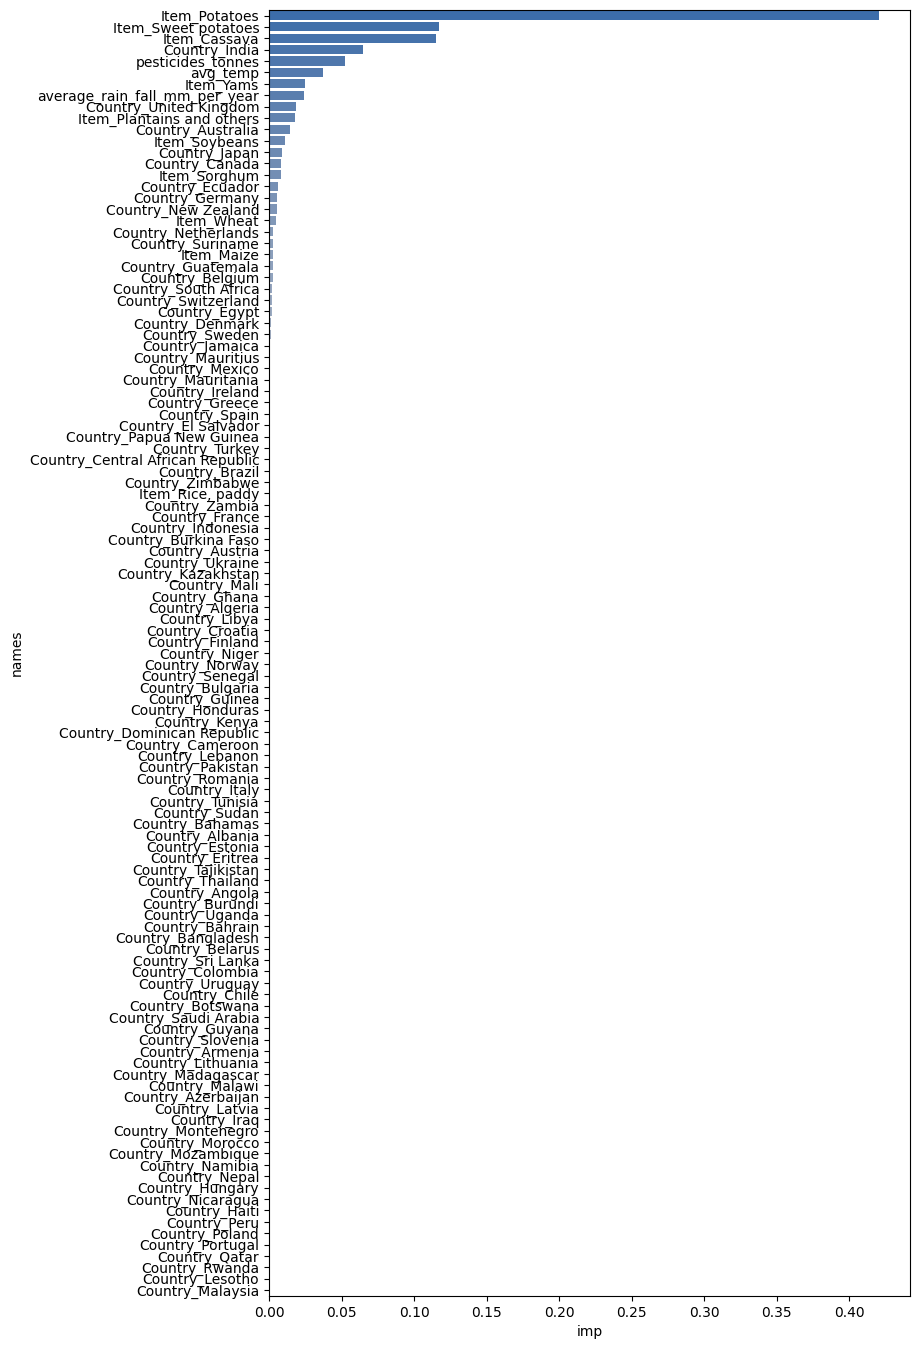

In [75]:
a4_dims = (8.27,16.7)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

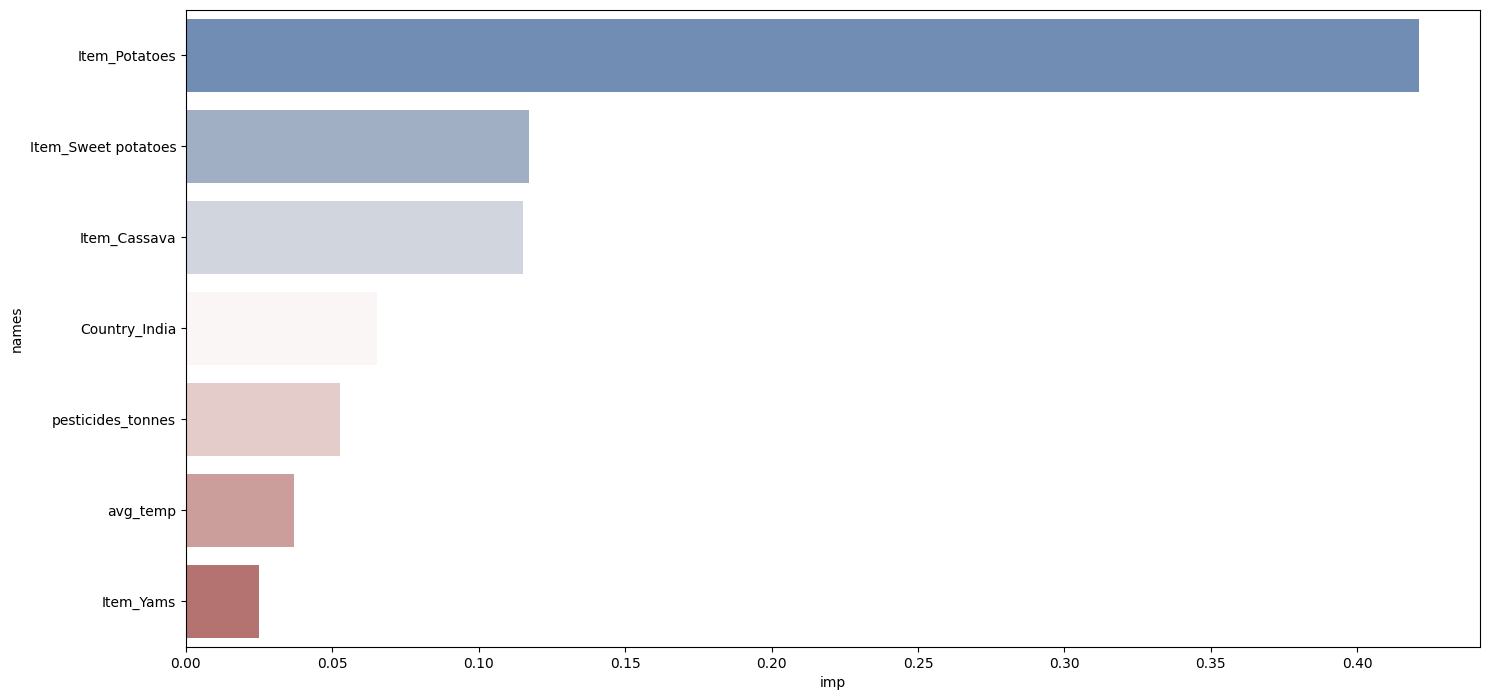

In [76]:
# Obtengo solo las 7 principales características importantes en el modelo:
# Los 7 factores más importantes que afectan a los cultivos 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

# Análisis Personal de la Importancia de Factores en el Modelo

Al revisar la importancia de los factores en el modelo, noté que el cultivo de papas tiene la mayor influencia en las decisiones del modelo. Este hallazgo tiene sentido, ya que las papas son los cultivos más destacados en nuestro conjunto de datos. Lo mismo se aplica a la yuca, que también tiene una importancia significativa.

Un resultado interesante es la influencia de los pesticidas, que ocupan el tercer lugar en importancia. Además, cuando el cultivo es de batatas, también se observa una alta importancia en el modelo.

Al considerar la ubicación, si el cultivo se encuentra en India, tiene una gran relevancia. Esto concuerda con la realidad, ya que India presenta la mayor suma de cultivos en nuestro conjunto de datos. Además, factores como la lluvia y la temperatura demuestran tener un impacto significativo en el rendimiento esperado de los cultivos, respaldando nuestras primeras suposiciones.

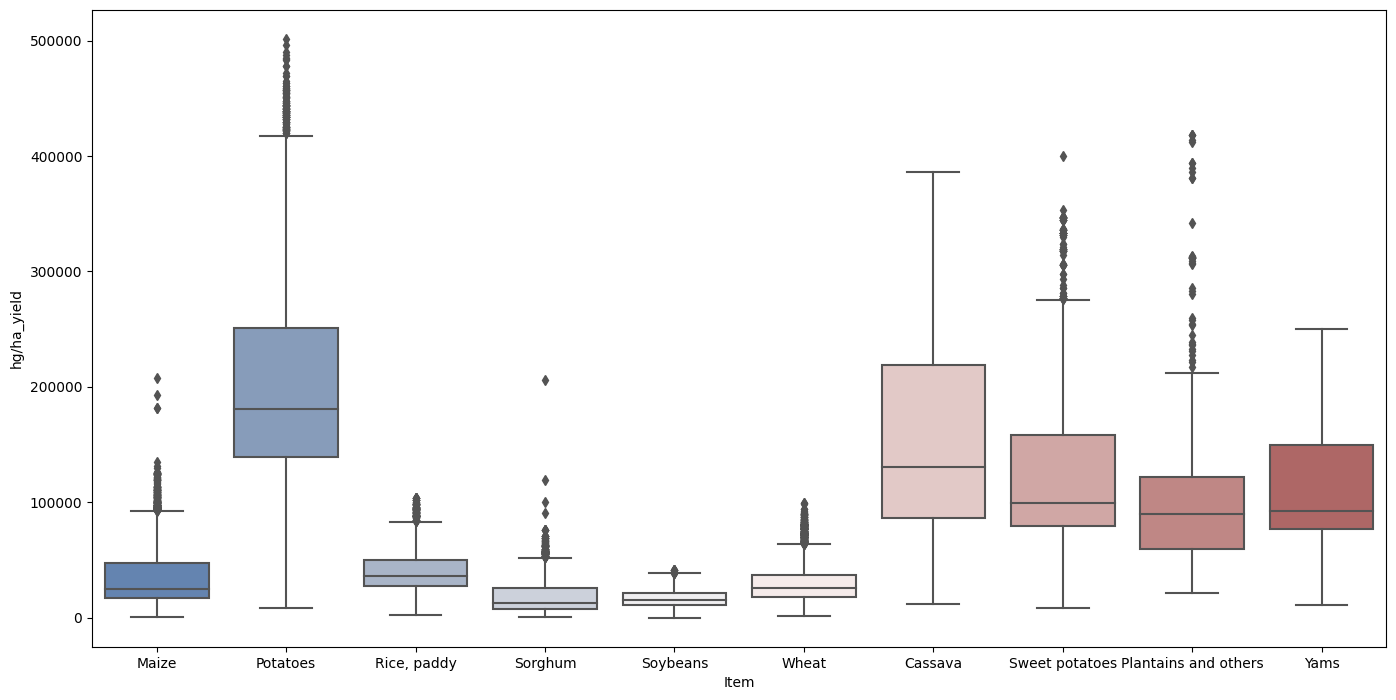

In [77]:
# Diagrama de Caja que Muestra el Rendimiento para Cada Ítem
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);

In [78]:
argentina_df = yield_df2[yield_df2['Area'] == 'Argentina']

In [79]:
argentina_df.to_csv('argentina_df', index=False)

In [80]:
argentina_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
377,Argentina,Cassava,1990,100000,591.0,26156.00,17.46
378,Argentina,Cassava,1990,100000,591.0,26156.00,17.67
379,Argentina,Maize,1990,34608,591.0,26156.00,17.46
380,Argentina,Maize,1990,34608,591.0,26156.00,17.67
381,Argentina,Potatoes,1990,202747,591.0,26156.00,17.46
...,...,...,...,...,...,...,...
740,Argentina,Soybeans,2013,25391,591.0,171945.54,16.88
741,Argentina,Sweet potatoes,2013,147498,591.0,171945.54,16.45
742,Argentina,Sweet potatoes,2013,147498,591.0,171945.54,16.88
743,Argentina,Wheat,2013,26581,591.0,171945.54,16.45
